In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [10]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [22]:
X_train.shape

(60000, 28, 28)

In [12]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [13]:
len(X_test)

10000

In [14]:
X_train[0].shape

(28, 28)

In [15]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

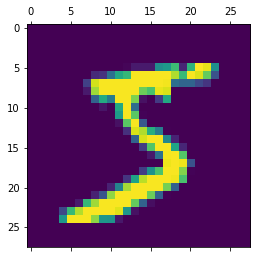

In [16]:
plt.matshow(X_train[0])

In [17]:
y_train[0]

5

In [18]:
X_train = X_train / 255
X_test = X_test / 255

In [19]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [32]:
sample_shape = X_train[0].shape
img_width, img_height = sample_shape[0], sample_shape[1]
X_shape = (img_width, img_height, 1)

# Reshape data 
X_train = X_train.reshape(len(X_train), X_shape[0], X_shape[1], X_shape[2])
X_test  = X_test.reshape(len(X_test), X_shape[0], X_shape[1], X_shape[2])

In [33]:
cnn = keras.Sequential([
    #cnn layers set 1
    layers.Conv2D(filters = 30, activation = 'relu', kernel_size=(3,3), input_shape = (28, 28,1)),  #conv layer, filters are figured out automaticaly
    #32 filters > can detect 30 different features
    #Kernel size > size of filter
    layers.MaxPooling2D(2,2),
    
    #cnn layers set 2
    layers.Conv2D(filters = 30, activation = 'relu', kernel_size=(3,3), input_shape = (28, 28,1)),                             
    layers.MaxPooling2D(2,2),
    
    #dense layers
    layers.Flatten(),                            #flatten layer, i/p size figured automaticaly
    layers.Dense(64, activation='relu'),         #need few neurons sinxe conv has done most work
    layers.Dense(10, activation='softmax')       #10 o/p category neurons, softmax: normalizes the probability output
])

cnn.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 28s 14ms/step - loss: 0.3620 - accuracy: 0.8920
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0568 - accuracy: 0.9822
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0373 - accuracy: 0.9878
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0286 - accuracy: 0.9905
Epoch 5/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0210 - accuracy: 0.9935
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0183 - accuracy: 0.9938
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0135 - accuracy: 0.9957
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0097 - accuracy: 0.9969
Epoch 9/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0103 - accuracy: 0.9965
Epoch 10/10
1875/1875 [==============================] - 32s 17m

In [34]:
cnn = models.Sequential([
    #cnn layers set 1
    layers.Conv2D(filters = 30, activation = 'relu', kernel_size=(3,3), input_shape = (28, 28,1)),  #conv layer, filters are figured out automaticaly
    #32 filters > can detect 30 different features
    #Kernel size > size of filter
    layers.MaxPooling2D(2,2),
    
    #cnn layers set 2
    layers.Conv2D(filters = 30, activation = 'relu', kernel_size=(3,3), input_shape = (28, 28,1)),                             
    layers.MaxPooling2D(2,2),
    
    #dense layers
    layers.Flatten(),                            #flatten layer, i/p size figured automaticaly
    layers.Dense(64, activation='relu'),         #need few neurons sinxe conv has done most work
    layers.Dense(10, activation='softmax')       #10 o/p category neurons, softmax: normalizes the probability output
])

cnn.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3590 - accuracy: 0.8934
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0571 - accuracy: 0.9826
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0389 - accuracy: 0.9880
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0282 - accuracy: 0.99120s - loss: 0.0282 - accura
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0231 - accuracy: 0.9927
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0156 - accuracy: 0.9951
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0134 - accuracy: 0.9956
Epoch 8/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0098 - accuracy: 0.9969
Epoch 9/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0086 - accuracy: 0.9974
Epoch 10/10
1875/1875 [===============

In [35]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0405 - accuracy: 0.9890


[0.040463365614414215, 0.9890000224113464]